In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
def compute_unit_vectors(theta, phi):
    # Compute n1
    n1 = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])

    # Compute n3( )
    n3 = np.array([np.sin(phi), -np.cos(phi), 0])  # Parallel to the z-axis but orthogonal to n1

    # Compute n2(we get by taking a cross product of n3 and n1)
    n2 = np.array([-np.cos(theta) * np.cos(phi), -np.cos(theta) * np.sin(phi), np.sin(theta)])

    # Normalize n2 and n3
    n2 /= np.linalg.norm(n2)
    n3 /= np.linalg.norm(n3)

    return n1, n2, n3

In [21]:
# Example usage:
theta = np.pi / 4  # Example value for theta
phi = np.pi / 3    # Example value for phi

n1, n2, n3 = compute_unit_vectors(theta, phi)
print("n1:", n1)
print("n2:", n2)
print("n3:", n3)

n1: [0.35355339 0.61237244 0.70710678]
n2: [-0.35355339 -0.61237244  0.70710678]
n3: [ 0.8660254 -0.5        0.       ]


In [22]:
def project_3d_points(point_data, n2, n3, color_coordinate):
    # Project 3D points onto the plane spanned by n2 and n3
    projected_points = np.dot(point_data, np.vstack((n2, n3)).T)

    # Extract one of the original point coordinates for color encoding
    color_values = point_data[:, color_coordinate]

    return projected_points, color_values


In [23]:
def plot_2d_scatter(projected_points, color_values):
    plt.scatter(projected_points[:, 0], projected_points[:, 1], c=color_values, cmap='viridis')
    plt.xlabel('Projection onto n2')
    plt.ylabel('Projection onto n3')
    plt.title('2D Scatter Plot of Projected Points')
    plt.colorbar(label='Color by Coordinate')
    plt.grid(True)
    plt.show()

In [24]:
data = np.load('points.npz')
point_data = data['points']
point_data

array([[-1.        ,  1.        , -1.        ],
       [-0.89473684,  1.        , -1.        ],
       [-0.78947368,  1.        , -1.        ],
       [-0.68421053,  1.        , -1.        ],
       [-0.57894737,  1.        , -1.        ],
       [-0.47368421,  1.        , -1.        ],
       [-0.36842105,  1.        , -1.        ],
       [-0.26315789,  1.        , -1.        ],
       [-0.15789474,  1.        , -1.        ],
       [-0.05263158,  1.        , -1.        ],
       [ 0.05263158,  1.        , -1.        ],
       [ 0.15789474,  1.        , -1.        ],
       [ 0.26315789,  1.        , -1.        ],
       [ 0.36842105,  1.        , -1.        ],
       [ 0.47368421,  1.        , -1.        ],
       [ 0.57894737,  1.        , -1.        ],
       [ 0.68421053,  1.        , -1.        ],
       [ 0.78947368,  1.        , -1.        ],
       [ 0.89473684,  1.        , -1.        ],
       [ 1.        ,  1.        , -1.        ],
       [-1.        , -1.        , -1.   

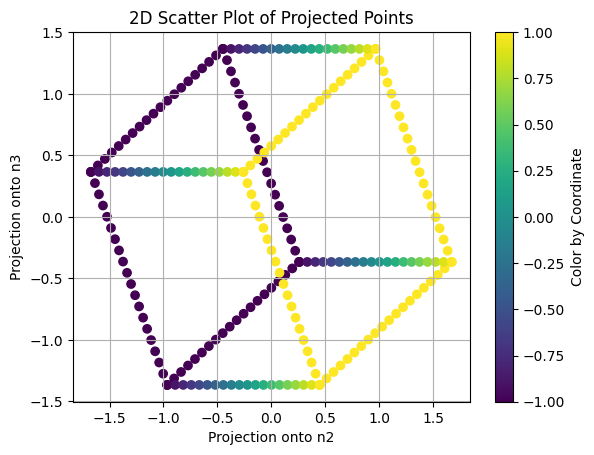

In [25]:
# Project 3D points onto the plane spanned by n2 and n3
projected_points, color_values = project_3d_points(point_data, n2, n3, color_coordinate)

# Plot the projected points as a 2D scatter plot
plot_2d_scatter(projected_points, color_values)

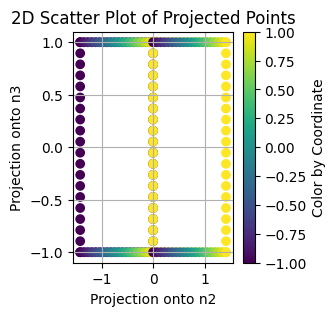

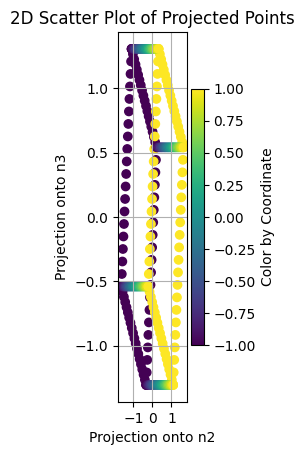

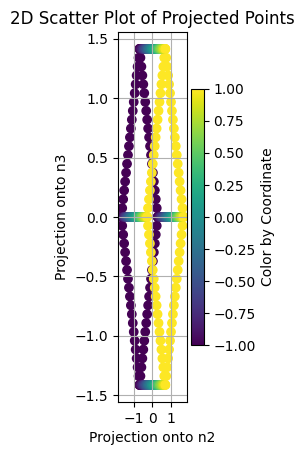

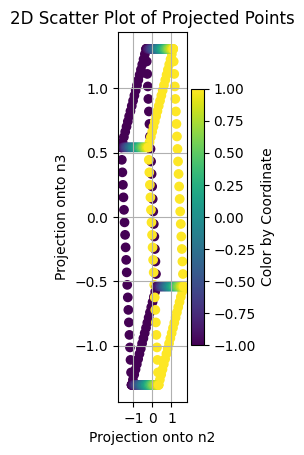

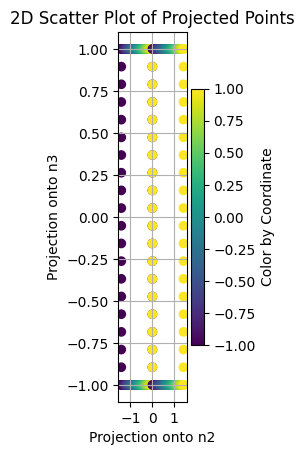

<Figure size 640x480 with 0 Axes>

In [28]:
theta = np.pi / 4  # Example value for theta
num_plots = 5       # Number of plots
phi_values = np.linspace(0, np.pi / 2, num_plots)
plt.figure(figsize=(15, 3))
for i, phi in enumerate(phi_values):
    n1, n2, n3 = compute_unit_vectors(theta, phi)
    projected_points, color_values = project_3d_points(point_data, n2, n3, 2)  # Encode z-coordinate as color
    plt.subplot(1, num_plots, i+1)
    plot_2d_scatter(projected_points, color_values)

plt.tight_layout()
plt.show()


In [30]:

def plot_unit_cube(ax):
    # Define vertices of the unit cube
    vertices = np.array([
        [-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, 1],
        [1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]
    ])

    # Define edges of the unit cube
    edges = [
        [0, 1], [0, 2], [0, 4], [1, 3],
        [1, 5], [2, 3], [2, 6], [3, 7],
        [4, 5], [4, 6], [5, 7], [6, 7]
    ]

    # Plot the edges of the unit cube
    for edge in edges:
        ax.plot3D(*zip(*vertices[edge]), color='black')



TypeError: project_3d_points() missing 1 required positional argument: 'color_coordinate'

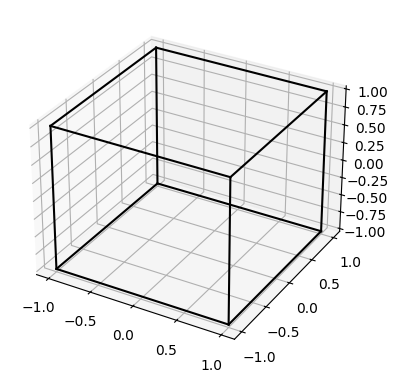

In [33]:
# Choose theta and phi for the orientation of the plane
theta = np.pi / 4
phi = np.pi / 4

# Compute unit vectors
n1, n2, n3 = compute_unit_vectors(theta, phi)

# Create a figure and 3D axis
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')

# Plot the unit cube
plot_unit_cube(ax)

# Project the unit cube onto the plane spanned by n2 and n3
projected_points = project_3d_points(point_data, n2, n3)

# Plot the projection as a 2D scatter plot
ax = fig.add_subplot(122)
ax.scatter(projected_points[:, 0], projected_points[:, 1], c='blue')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('Projection onto n2')
ax.set_ylabel('Projection onto n3')
ax.set_title('Projection of Unit Cube')
ax.grid(True)

plt.tight_layout()
plt.show()